In [28]:
# import the required libraries
import numpy as np
import scipy.stats
import functools
import pandas as pd
import argparse
import scipy as sc
import numpy.matlib as npm
import sys
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

In [29]:
def compute_ci(data):

    n = data.shape[1]
    se = scipy.stats.sem(data, axis = 0)
    h = se * scipy.stats.t.ppf(1.95 / 2., n-1)
    return h

In [36]:
def lag_fig(xmapy_surr, ymapx_surr, xmapy, ymapx, x_name, y_name):
    x = np.arange(-10,11)
    x_ticks = np.arange(-10,11,2)

    #plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=50)     # fontsize of the axes title
    plt.rc('axes', labelsize=50)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=40)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=40)    # fontsize of the tick labels
    plt.rc('legend', fontsize=30)    # legend fontsize
    plt.rc('figure', titlesize=40)
    
    mean_xmapy = xmapy.mean(axis = 0)
    mean_ymapx = ymapx.mean(axis = 0)
    
    mean_xmapy_surr = xmapy_surr.mean(axis = 0)
    mean_ymapx_surr = ymapx_surr.mean(axis = 0)

    ci_xmapy = compute_ci(xmapy)
    ci_ymapx = compute_ci(ymapx)
    
    ci_xmapy_surr = compute_ci(xmapy_surr)
    ci_ymapx_surr = compute_ci(ymapx_surr)

    fig, axs = plt.subplots(figsize = (18,12))
    

    axs.plot(x, mean_xmapy, 'C0-', label= y_name + r'$\rightarrow$' + x_name)
    axs.plot(x, xmapy_surr.mean(axis = 0), 'C0--', label = y_name + r'$\rightarrow$' + x_name + ' surrogate')
    axs.fill_between(x, mean_xmapy - ci_xmapy, mean_xmapy + ci_xmapy, color='C0', alpha=0.2)
    axs.fill_between(x, xmapy_surr.mean(axis = 0) - ci_xmapy_surr, xmapy_surr.mean(axis = 0) + ci_xmapy_surr, color='C0', alpha=0.1)

    axs.plot(x, mean_ymapx, 'C1-', label= x_name + r'$\rightarrow$' + y_name)
    axs.plot(x, ymapx_surr.mean(axis = 0), 'C1--', label = x_name + r'$\rightarrow$' + y_name + ' surrogate')
    axs.fill_between(x, mean_ymapx - ci_ymapx, mean_ymapx + ci_ymapx, color='C1', alpha=0.2)
    axs.fill_between(x, ymapx_surr.mean(axis = 0) - ci_ymapx_surr, ymapx_surr.mean(axis = 0) + ci_ymapx_surr, color='C1', alpha=0.1)

    axs.set_xticks(x_ticks)
    axs.grid(linestyle = '--', alpha = 0.5)

    axs.set_ylabel(r'$\rho$', rotation = 0, fontsize = 55, labelpad = 15)
    axs.set_xlabel(r'$\tau$', fontsize = 55)
    #plt.title('Correlation vs Lag')
    plt.legend(loc = 4)
    #plt.savefig('para_didi.png', dpi=300)

    return axs

In [34]:
para_didi = np.load('para_didi_results.npy')

<AxesSubplot:xlabel='$\\tau$', ylabel='$\\rho$'>

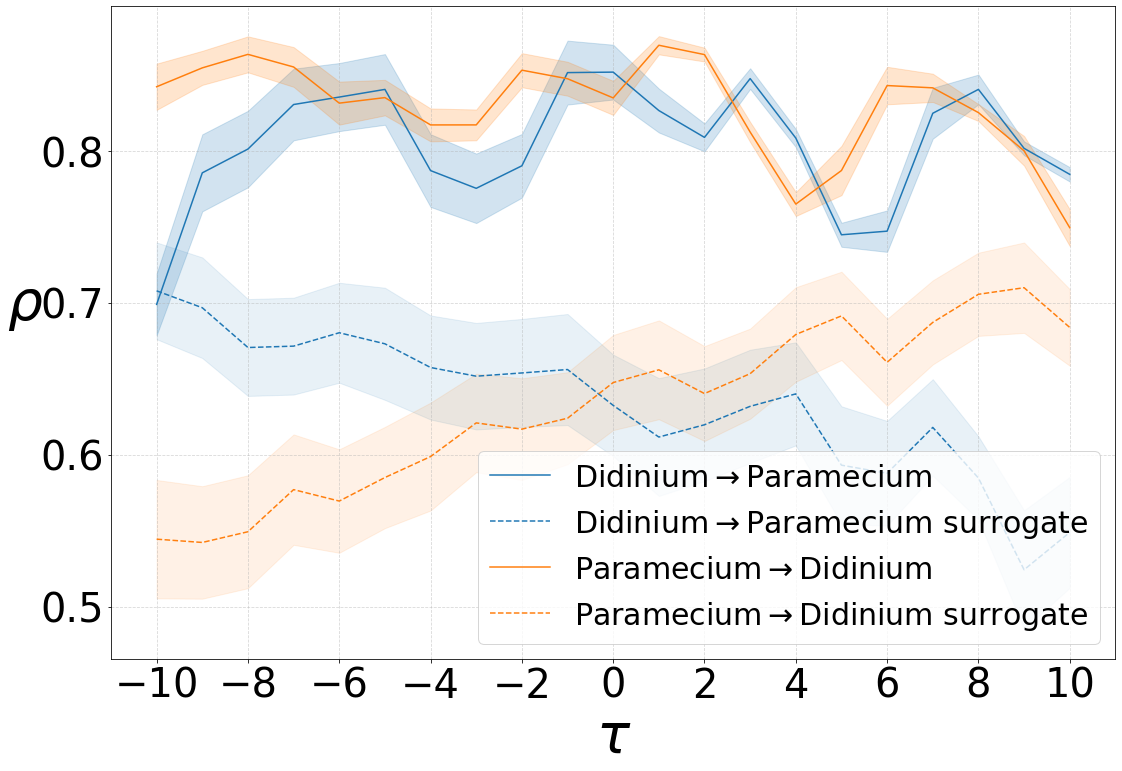

In [35]:
lag_fig(para_didi[:,:,0], para_didi[:,:,1], para_didi[:,:,2], para_didi[:,:,3], 'Paramecium', 'Didinium')